In [1]:
from itertools import permutations
import xgboost
from sklearn.ensemble import GradientBoostingRegressor
import shap
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import re
import statsmodels.api as sm
from sklearn import svm
import statsmodels.api as sm
from statsmodels.formula.api import glm
import io
import datetime
import random
from scipy.stats import poisson
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, precision_score, recall_score)
from sklearn.preprocessing import PolynomialFeatures


C:\Users\dnishimoto\.conda\envs\Deeplearning2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def create_array(list_list):
    my_list = []
    for i in list_list:
        for j in i:
            my_list.append(j)

    return my_list

#def permutation(my_list, start, end):
#    if start == end:
#        print(my_list)
#    else:
#        for i in range(start, end+1):
#            my_list[start], my_list[i] = my_list[i], my_list[start]
#            permutation(my_list, start+1, end)
#            my_list[start], my_list[i] = my_list[i], my_list[start]
            


In [3]:
myList_List = [[1.2, 1.3, 1.4],[ 2.1, 2.2],[ 3.1 ]];

myArray=create_array(myList_List)
print(*permutations(myArray,3))

(1.2, 1.3, 1.4) (1.2, 1.3, 2.1) (1.2, 1.3, 2.2) (1.2, 1.3, 3.1) (1.2, 1.4, 1.3) (1.2, 1.4, 2.1) (1.2, 1.4, 2.2) (1.2, 1.4, 3.1) (1.2, 2.1, 1.3) (1.2, 2.1, 1.4) (1.2, 2.1, 2.2) (1.2, 2.1, 3.1) (1.2, 2.2, 1.3) (1.2, 2.2, 1.4) (1.2, 2.2, 2.1) (1.2, 2.2, 3.1) (1.2, 3.1, 1.3) (1.2, 3.1, 1.4) (1.2, 3.1, 2.1) (1.2, 3.1, 2.2) (1.3, 1.2, 1.4) (1.3, 1.2, 2.1) (1.3, 1.2, 2.2) (1.3, 1.2, 3.1) (1.3, 1.4, 1.2) (1.3, 1.4, 2.1) (1.3, 1.4, 2.2) (1.3, 1.4, 3.1) (1.3, 2.1, 1.2) (1.3, 2.1, 1.4) (1.3, 2.1, 2.2) (1.3, 2.1, 3.1) (1.3, 2.2, 1.2) (1.3, 2.2, 1.4) (1.3, 2.2, 2.1) (1.3, 2.2, 3.1) (1.3, 3.1, 1.2) (1.3, 3.1, 1.4) (1.3, 3.1, 2.1) (1.3, 3.1, 2.2) (1.4, 1.2, 1.3) (1.4, 1.2, 2.1) (1.4, 1.2, 2.2) (1.4, 1.2, 3.1) (1.4, 1.3, 1.2) (1.4, 1.3, 2.1) (1.4, 1.3, 2.2) (1.4, 1.3, 3.1) (1.4, 2.1, 1.2) (1.4, 2.1, 1.3) (1.4, 2.1, 2.2) (1.4, 2.1, 3.1) (1.4, 2.2, 1.2) (1.4, 2.2, 1.3) (1.4, 2.2, 2.1) (1.4, 2.2, 3.1) (1.4, 3.1, 1.2) (1.4, 3.1, 1.3) (1.4, 3.1, 2.1) (1.4, 3.1, 2.2) (2.1, 1.2, 1.3) (2.1, 1.2, 1.4) (2.1, 1.

[[-2.9991112  0.       ]
 [-2.9991112  0.       ]
 [-2.9991112  0.       ]]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


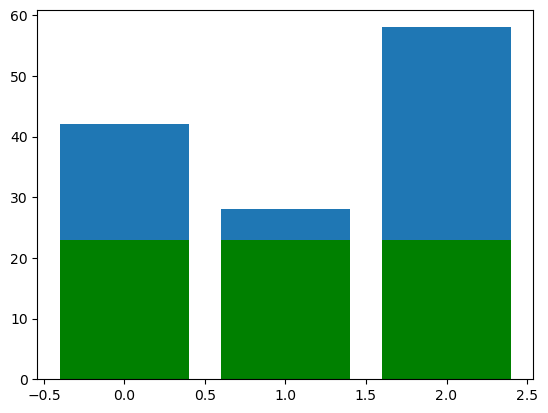

In [4]:
df = pd.DataFrame({'target':[23,42,58,29,28],
                      'feature_1' : [38, 83, 38, 28, 57],
                      'feature_2' : ['A', 'B', 'A', 'C','A']
                  })

df["feature_1"]=df["feature_1"].astype(int)
df["target"]=df["target"].astype(int)

encoder = preprocessing.LabelEncoder()
df["feature_2"]=encoder.fit_transform(df["feature_2"])

SEED=42
#model = xgboost.XGBRegressor(enable_categorical=True,tree_method='hist')
model=xgboost.XGBRegressor(enable_categorical=True,tree_method='hist')
#model = GradientBoostingRegressor(n_estimators=100, max_depth=2, random_state=SEED)

scale= StandardScaler()

#X=df[["feature_1","feature_2"]]
columns=["feature_1","feature_2"]
n_features=len(columns)
X=np.array(scale.fit_transform(df[columns])).reshape(-1,n_features)
y=np.array(df["target"])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.6,random_state=42)
model.fit(X_train,y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
print(shap_values)


y_pred=model.predict(X_test)

x=np.arange(len(X_test))
plt.bar(x,y_test)
plt.bar(x,y_pred,color='green')
plt.show()


In [83]:
def extract_year(text):
    """Extract year from text using regular expression"""
    #pattern = "(?<=\/).*(\d{2,4}\s) | (\syear\s\d{2,4}\s)" # regular expression pattern to look for
    pattern = "(?<=\d\/)\d{2,4}\s|(?<=\syear)\s+\d{2,4}" # regular expression pattern to look for
    result = re.findall(pattern, text)
    return result

# test cases
text1 = "The 10/24/1990  1/2/1992 Academy Awards, also called the Oscars, are a set of awards given annually for excellence of cinematic achievements. The awards, organized by the Academy of Motion Picture Arts and Sciences (AMPAS), were first handed out in 1929. At first, the Academy Awards ceremony was held in various locations such as a banquet hall of a hotel, until it finally settled at the Hollywood Roosevelt Hotel in the year 1929. The first Academy Awards ceremony consisted of a private dinner for 250 people in the Blossom Room of the Roosevelt Hotel, with an audience of five hundred people."
text2 = "The 10/24/91 Academy Awards, also called the Oscars, are a set of awards given annually for excellence of cinematic achievements. The awards, organized by the Academy of Motion Picture Arts and Sciences (AMPAS), were first handed out in 1929. At first, the Academy Awards ceremony was held in various locations such as a banquet hall of a hotel, until it finally settled at the Hollywood Roosevelt Hotel in the year 1929. The first Academy Awards ceremony consisted of a private dinner for 250 people in the Blossom Room of the Roosevelt Hotel, with an audience of five hundred people. Since then, the Academy Awards ceremonies take place every year except in the year 1943. That year, due to the World War II, the ceremony was not held. The Academy Awards ceremony is one of the oldest award ceremonies in the United States."

print(extract_year(text1))
print(extract_year(text2))

['1990 ', '1992 ', ' 1929']
['91 ', ' 1929', ' 1943']


In [2]:
print("find all combinations of a with b")
a = np.array(['x', 'y'])
b = np.array(['a', 'b', 'c'])

def find_combination(a, b):
    result = []
    for i in range(len(a)):
        for j in range(len(b)):
            result.append(a[i] + b[j])
    return result


print(find_combination(a, b))

find all combinations of a with b
['xa', 'xb', 'xc', 'ya', 'yb', 'yc']


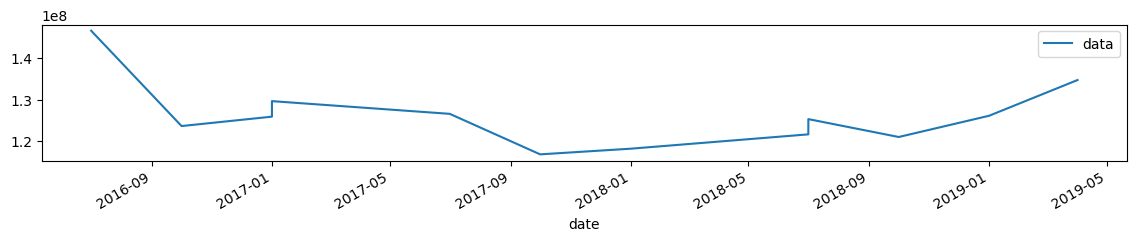

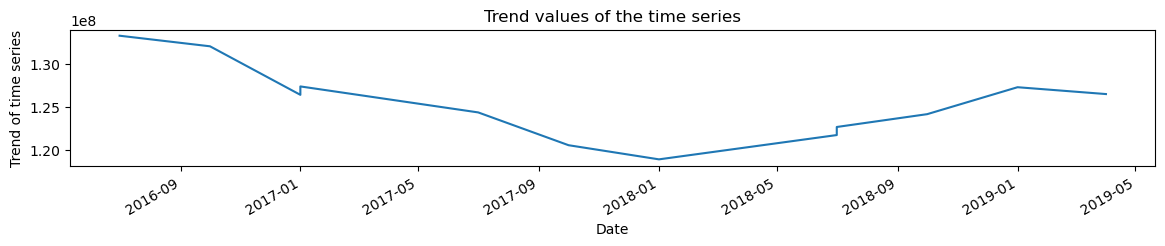

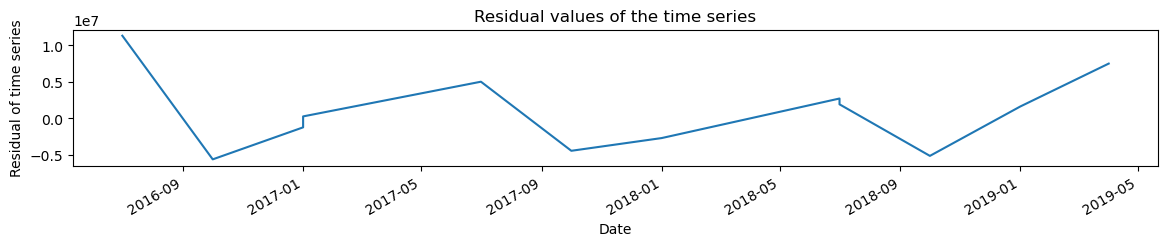

In [10]:
date=['2016Q3'
 ,'2016Q4'
 ,'2017Q1'
 ,'2017Q1'
 ,'2017Q3'
 ,'2017Q4'
 ,'2018Q1'
 ,'2018Q3'
 ,'2018Q3'
 ,'2018Q4'
 ,'2019Q1'
 ,'2019Q2']

data=[146660510.0
 ,123641451.0
 ,125905843.0
 ,129656327.0
 ,126586708.0
 ,116804168.0
 ,118167263.0
 ,121633740.0
 ,125314447.0
 ,120994896.0
 ,126124709.0
 ,134753318.0]

df=pd.DataFrame({'date':date,'data':data})
df['date']=pd.to_datetime(df['date'])
df=df.set_index('date')
ax=df.plot(figsize=(14,2))
plt.show()

decomposition=sm.tsa.seasonal_decompose(x=df['data'],model='additive',      extrapolate_trend='freq', period=3)

decomposition_trend=decomposition.trend
ax= decomposition_trend.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend values of the time series')
plt.show()

decomposition_residual=decomposition.resid
ax= decomposition_residual.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()

In [13]:
txt="""111 abc<pre>seven
eight
nine
ten
eleven
twelve</pre>
<pre> one 
two 
three 
four 
five 
six </pre>def"""
results= re.findall(r'<pre>(.*?)</pre>', txt,re.DOTALL)
print(results)
word_list=[]
for item in results:
    print(item)
    words=item.split("\n")
    for word in words:
        word_list.append(word)
        
print(word_list)

['seven\neight\nnine\nten\neleven\ntwelve', ' one \ntwo \nthree \nfour \nfive \nsix ']
seven
eight
nine
ten
eleven
twelve
 one 
two 
three 
four 
five 
six 
['seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', ' one ', 'two ', 'three ', 'four ', 'five ', 'six ']


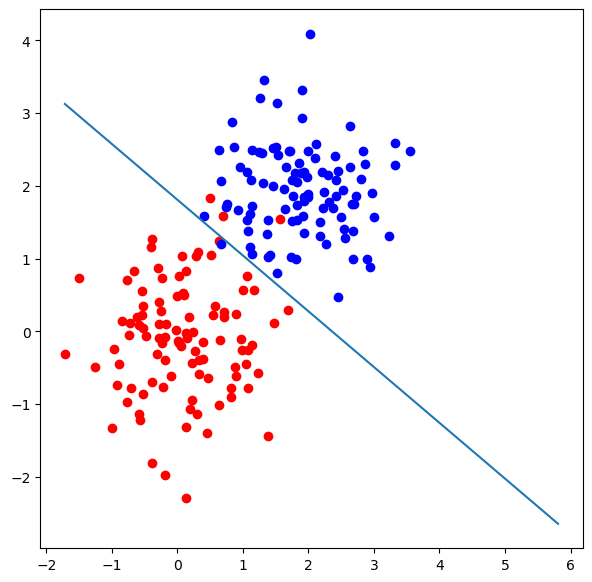

In [32]:
#1. svm.LinearSVC and svm.SVC #Kernel SVM
#2. C hyper parameter (inverse regularization strength)
#3. kernel (type of kernel)
#4. gamma (inverse RBF smoothness)

np.random.seed(123)

## generate data
x1 = np.random.multivariate_normal([0,0],[[.5,0],[0,.5]],100)
x2 = np.random.multivariate_normal([2,2],[[.5,0],[0,.5]],100)
x3 = np.random.multivariate_normal([4,4],[[.5,0],[0,.5]],100)
X = np.vstack([x1,x2,x3])
Y = np.hstack([np.repeat(0,100),np.repeat(1,100),np.repeat(2,100)])

## plot data
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x1[:,0],x1[:,1],color='r',label='class 0')
ax.scatter(x2[:,0],x2[:,1],color='b',label='class 1')


best_score = 0
for C in np.logspace(0,1,num=50):
    for g in np.logspace(-3,3,num=50):
        rbf_svm = svm.SVC(kernel="linear",C=C,gamma=g,random_state=123)
        rbf_svm.fit(X,Y)
        score = rbf_svm.score(X,Y)
        if score>best_score:
            best_score = score
            best_C = C
            best_g = g

model = svm.SVC(C=best_C,kernel='linear',gamma=best_g,random_state=123)
model.fit(X,Y)
y_pred=model.predict(X)
#print(y_pred)

w=model.coef_[0]
a= -w[0]/w[1]

xx=np.linspace(np.min(X[:,0]),np.max(X[:,0]),len(X))
yy=a * xx-model.intercept_[0]/w[1]

#print(w)
ax.plot(xx,yy)
#plt.plot(X[:,0],y_pred)
plt.show()

In [43]:
txt1="""hello
xxxx
yyyy
world"""


txt2="""hello
xxxx
yyyy
BAD_WORD
world"""

results = re.findall(r'(hello)(.*)(?!BAD_WORD)(.*)(world)', txt2,re.DOTALL)
#(?!BAD_WORD).*world
print(results)

[('hello', '\nxxxx\nyyyy\nBAD_WORD\n', '', 'world')]


In [2]:
data="""UniqueNo.	Year2000	Year2001	YearTarget
ABC123	2	4	2
DEF456	1	3	3
"""
df = pd.read_csv(io.StringIO(data), sep='\t')
print(df.columns)
print(df.head())

model_formula='YearTarget~Year2000+Year2001'

model = glm(model_formula, data =df, family = sm.families.Poisson()).fit()

print(model.summary())

intercept, slope = model.params

# Print coefficients
print('Intercept =', intercept)
print('Slope =', slope)

# Extract and print confidence intervals
print(model.conf_int())

Index(['UniqueNo.', 'Year2000', 'Year2001', 'YearTarget'], dtype='object')
  UniqueNo.  Year2000  Year2001  YearTarget
0    ABC123         2         4           2
1    DEF456         1         3           3


PerfectSeparationError: Perfect separation detected, results not available

In [7]:
print("Create a new dictionary with a new key using the dict2 mapping")
dict1 = {4: [741, 114, 306, 70],
         2: [77, 325, 505, 144],
         3: [937, 339, 612, 100],
         1: [52, 811, 1593, 350]}
dict2 = {1: 'A', 2: 'B', 3: 'C', 4: 'D'}

dict3={dict2[key]: dict1[key] for key in dict2}
print(dict3)

Create a new dictionary with a new key using the dict2 mapping
{'A': [52, 811, 1593, 350], 'B': [77, 325, 505, 144], 'C': [937, 339, 612, 100], 'D': [741, 114, 306, 70]}


In [25]:
print("join characters and split on space and create a list of lists")
a = ["a", " ", "b", "i", "g", " ", "d", "o", "g", " ", "b", "i", "t", " ", "m", "e"]
def ToList(x):
    return [x]
result=[*map(lambda x:[x],"".join(a).split(" "))]
print(result)

join characters and split on space and create a list of lists
[['a'], ['big'], ['dog'], ['bit'], ['me']]


In [39]:
data="""Data	Codigo	de barras    Categoria	Marca    
2022-12-31	590688144812	55	AW0152
2022-12-31	No	34	CÂMARA  
2022-12-31	No	34	CÂMARA FULL"""
   
df = pd.read_csv(io.StringIO(data), sep='\t')
print(df.head() )
data_dict = {}
#data_dict['df'] = create_dataframe(df)
#data_dict['df']
output = df.to_json(orient='records')
print(output)
df["dict"]=""
for index, row in df.iterrows():
    print(row.to_json(orient='records'))
    df[index,"dict"]=row.to_json(orient='records')
    print(df.iloc[index]["dict"])



         Data        Codigo  de barras    Categoria    Marca    
0  2022-12-31  590688144812                      55       AW0152
1  2022-12-31            No                      34     CÂMARA  
2  2022-12-31            No                      34  CÂMARA FULL
[{"Data":"2022-12-31","Codigo":"590688144812","de barras    Categoria":55,"Marca    ":"AW0152"},{"Data":"2022-12-31","Codigo":"No","de barras    Categoria":34,"Marca    ":"C\u00c2MARA  "},{"Data":"2022-12-31","Codigo":"No","de barras    Categoria":34,"Marca    ":"C\u00c2MARA FULL"}]
["2022-12-31","590688144812",55,"AW0152",""]

["2022-12-31","No",34,"C\u00c2MARA  ",""]

["2022-12-31","No",34,"C\u00c2MARA FULL",""]



In [30]:
date=5679

def convert_excel_time(excel_time):
    '''
    converts excel float format to pandas datetime object
    round to '1min' with 
    .dt.round('1min') to correct floating point conversion innaccuracy
    '''
    
    return pd.to_datetime('1899-12-30') + pd.to_timedelta(excel_time,'D')

print(convert_excel_time(date))

https://gist.github.com/OmarArain/9959241
    
#datetime.date(int(date[0:4]), int(date[4:6]), int(date[6:8])).toordinal()

1915-07-19 00:00:00


[100, 100, 100]
[-169244, -87338, -22300]
36768747780


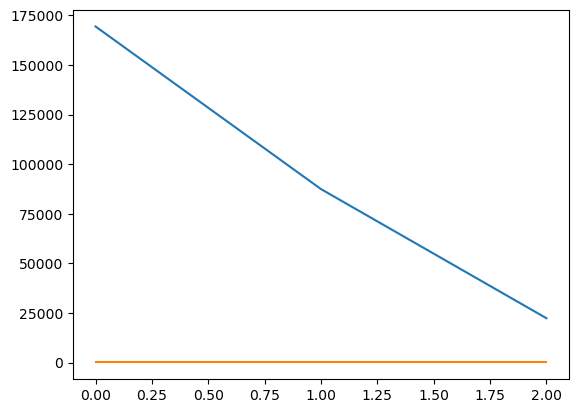

In [21]:
def Generate(length, max_value, seed=None):
    if seed is not None:
        random.seed(seed)
    return [[random.randint(0, max_value) for i in range(length)] for j in range(length)]

# We can use our function from above to generate 3 dimensional data
# We use the same max_value and length as above
data = Generate(3, 100)

expected = [100,100,100]

print(expected)

# We generate the actual values using our data
actual = [x*y*z for (x,y,z) in data]

plt.plot(actual)
plt.plot(expected)

# We calculate the difference between the expected and actual values
difference = [expected[i] - actual[i] for i in range(len(expected))]

# We print the difference
print(difference)

# We calculate the sum of the squares of the differences
s = 0
for i in difference:
    s += i**2
# We print the sum of the squares of the differences
print(s)

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


<Axes: xlabel='y', ylabel='x'>

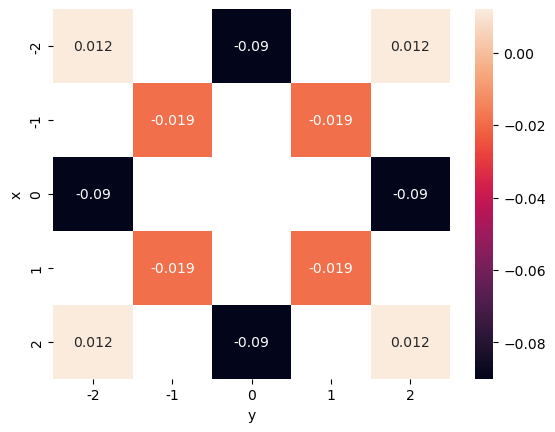

In [18]:
x=np.array([-1, 1, -1, 1, 0, 2, -2, 0, 2, -2, -2, 2])
y=np.array([1, 1, -1, -1, 2, 0, 0, -2, 2, 2, -2, -2])
J=np.array([-0.019, -0.019, -0.019, -0.019, -0.09, -0.09, -0.09, -0.09, 0.012, 0.012, 0.012, 0.012])


df = pd.DataFrame(dict(x=x, y=y, intensity=J))
sns.heatmap(df.pivot('x', 'y', 'intensity'), annot=True)

In [2]:
data="""
            foo
            bar
      bbl dklha
        bbl hoi
    bbl lala ho
      bbl ljhkh
"""

def create_list(data):
    return data.split()

my_list = create_list(data)

print(my_list)

def replace_element(list, replace_word):
    for i in range(len(list)):
        if list[i].startswith(replace_word):
            list[i] = 'bbl_leerling'

    return my_list

print(replace_element(my_list, 'bbl'))

['foo', 'bar', 'bbl', 'dklha', 'bbl', 'hoi', 'bbl', 'lala', 'ho', 'bbl', 'ljhkh']
['foo', 'bar', 'bbl_leerling', 'dklha', 'bbl_leerling', 'hoi', 'bbl_leerling', 'lala', 'ho', 'bbl_leerling', 'ljhkh']




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



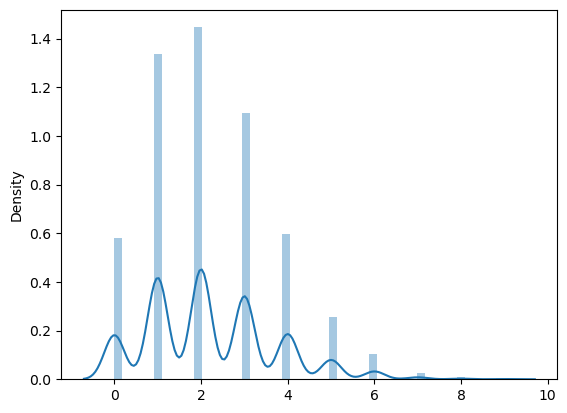

[1067    0    0    0 2452    0    0    0 2657    0    0    0    0 2007
    0    0    0 1093    0    0    0    0  467    0    0    0  189    0
    0    0    0   47    0    0    0   15    0    0    0    6]


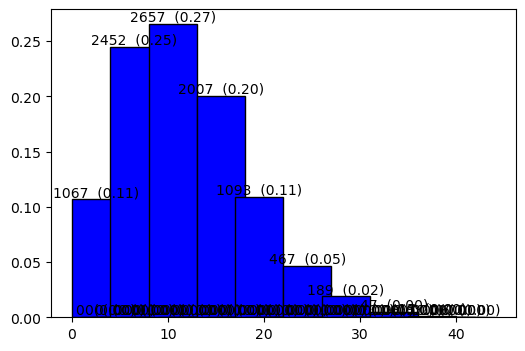

In [2]:
def plotPpf(start,end,mu,title):
    data=[]
    x_labels=[]
    for i in np.arange(start,end,0.1):
        data.append(float('%.3f' % poisson.ppf(q=i,mu=mu)))
        x_labels.append('%.1f' % i)
    labels=data
    data=pd.Series(data)
    fig, ax = plt.subplots(figsize=(12, 8))
    data.plot(kind="bar",ax=ax)
    ax.set_xticklabels(x_labels)
    rects=ax.patches
    for rect, label in zip(rects, labels):
        ax.text(
            rect.get_x() + rect.get_width() / 2,label, label, ha="center", va="bottom"
        )
    plt.title(title)
    plt.show()

    
def plotSf(start,end,mu,title):
    data=[]
    #x_labels=[]
    for i in np.arange(start,end):
        data.append(float('%.2f' % poisson.sf(i,mu=mu)))
        #x_labels=i
    #labels=data
    data=pd.Series(data)
    fig, ax = plt.subplots(figsize=(12, 8))
    data.plot(kind="bar",ax=ax)
    #x.set_xticklabels(x_labels)
    rects=ax.patches
    for rect, label in zip(rects, labels):
        ax.text(
            rect.get_x() + rect.get_width() / 2,label, label, ha="center", va="bottom"
        )
    plt.title(title)
    plt.show()

def plotCdf(start,end,mu,title):
    data=[]
    for i in np.arange(start,end):
        data.append(float('%.2f' % poisson.cdf(i,mu=mu)))
    labels=data
    data=pd.Series(data)
    fig, ax = plt.subplots(figsize=(12, 8))
    data.plot(kind="bar",ax=ax)
    #x.set_xticklabels(data)
    rects=ax.patches
    for rect, label in zip(rects, labels):
        ax.text(
            rect.get_x() + rect.get_width() / 2,label, label, ha="center", va="bottom"
        )
    plt.title(title)
    plt.show()

def plotPmf(start, end,mu,title):
    data=[]
    for i in np.arange(start,end):
        data.append(float('%.2f' % poisson.pmf(i,mu=mu)))
    labels=data
    data=pd.Series(data)
    fig, ax = plt.subplots(figsize=(6, 4))
    data.plot(kind="bar",ax=ax)
    #x.set_xticklabels(data)
    rects=ax.patches
    for rect, label in zip(rects, labels):
        ax.text(
            rect.get_x() + rect.get_width() / 2,label, label, ha="center", va="bottom"
        )
    plt.title(title)
    plt.show()
def plotRandomSample(size,mu):
    sample=poisson.rvs(mu=mu,size=size,random_state=42)
    sns.distplot(sample,kde=True)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(6, 4))
    segments=40
    bins = np.arange(0,segments+1)
    hist,edges=np.histogram(sample,bins=segments)
    print(hist)
    freq = hist/float(hist.sum())
    plt.bar(bins[:-1], freq, width=5, align="edge", ec="k", color='blue')
   
    rects=ax.patches
    for rect, freq,label in zip(rects, freq,hist):
        ax.text(
            rect.get_x() + rect.get_width() / 2,freq, str(label) + " " + str(" (%.2f)" % freq), ha="center", va="bottom"
        )
    plt.show()
    
#plotPmf(0,8,2.2,"Probability of calls per minute")
#plotCdf(0,8,2.2,"Probability of less than equal calls per minute")
#plotSf(0,8,2.2,"Probability of greater than calls per minute")
#plotPpf(0,1,2.2,"Percent Probability of greater than calls per minute")
plotRandomSample(10000,2.2)

In [5]:
data="airspeed (AS) user (104A, 104B) device (101) vehicles (105A-C)"

regex = re.compile(r'\((\d{3}.*?)\)')
matches = regex.finditer(data)
output = []
for match in matches:
    output.append(match.group(0))
print(output)

['(104A, 104B)', '(101)', '(105A-C)']


   ID  EyeColor  HairColor  EducationLevel  Income
0   1         1          1               1       1
1   2         1          1               2       2
2   3         2          2               1       1


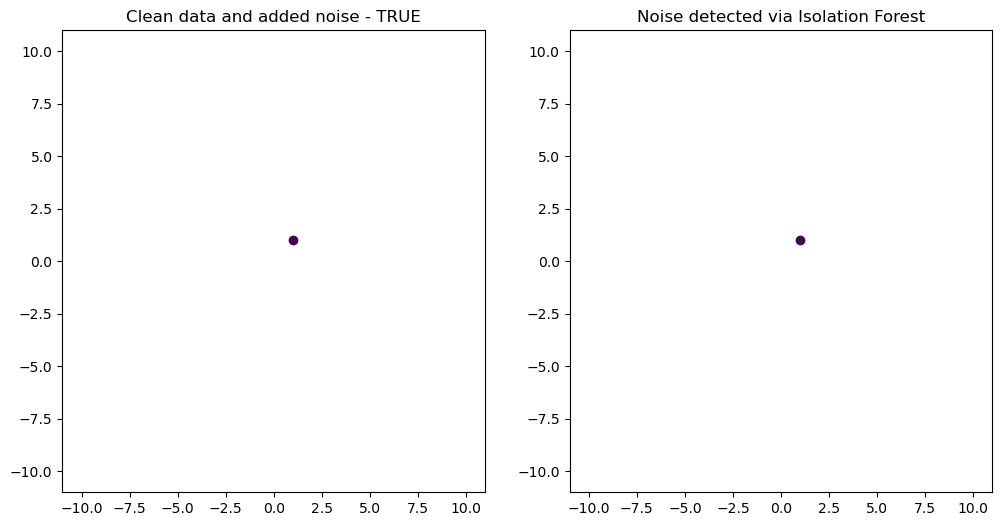

In [22]:
data="""ID	EyeColor	HairColor	EducationLevel	Income
1	1	1	1	1
2	1	1	2	2
3	2	2	1	1"""

df = pd.read_csv(io.StringIO(data), sep='\t')
print(df.head() )
clf=IsolationForest()

X=df[["EyeColor","HairColor","EducationLevel"]]
y=df["Income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=42)

#n_estimators, max_samples, max_features
#-1 represents the outliers (according to the fitted model)

clf = IsolationForest(max_samples=2,n_estimators=10, random_state=10)
clf.fit(X_train)
y_pred_test = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred_test)
#sns.heatmap(cm)

def plot_detected_anomalies(X, true_labels, predicted_anomalies):
	#y_pred_inliers = X[predicted_anomalies == -1, :]
	# PLOTTING RESULTS
	plt.figure(figsize=(12, 6))
	plt.subplot(121)
	plt.scatter(X[:, 0], X[:, 1], c=true_labels)
	plt.title('Clean data and added noise - TRUE')
	plt.xlim([-11, 11])
	plt.ylim([-11, 11])
	plt.subplot(122)
	plt.scatter(X[:, 0], X[:, 1], c=predicted_anomalies)
	plt.title('Noise detected via Isolation Forest')
	plt.xlim([-11, 11])
	plt.ylim([-11, 11])
	plt.show()

plot_detected_anomalies(np.array(X_test[["EyeColor","EducationLevel"]]), y_test, y_pred_test)    

Index(['Unnamed: 0', 'ID', 'Income', 'Age', 'Education', 'Gender'], dtype='object')


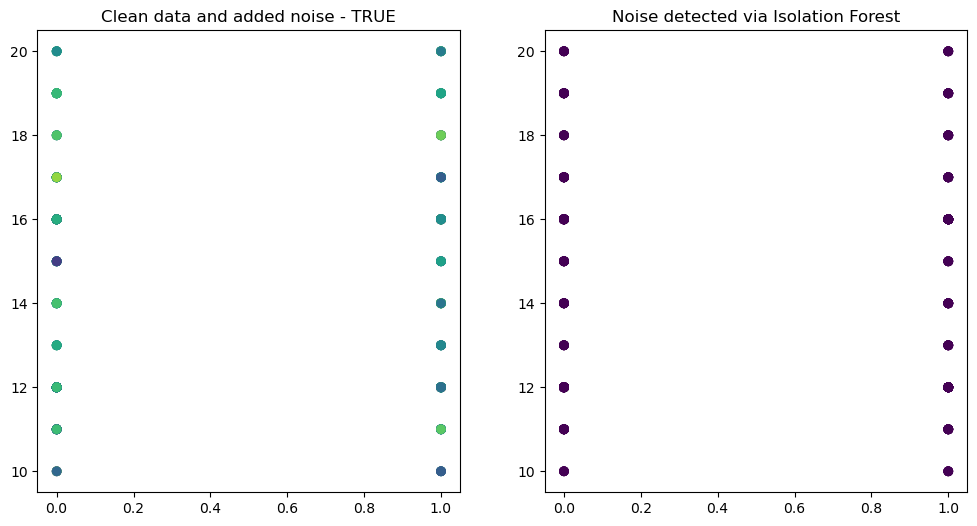

In [2]:
#df=pd.read_csv("https://raw.githubusercontent.com/reisanar/datasets/master/income.csv")
#df.to_csv("clustering_income.csv")
df=pd.read_csv("clustering_income.csv")
print(df.columns)

columns=['Age', 'Education', 'Gender']
X=df[columns]
y=df["Income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=42)

#n_estimators, max_samples, max_features
#-1 represents the outliers (according to the fitted model)

clf = IsolationForest(max_samples=2,n_estimators=10, random_state=10)
clf.fit(X_train)
y_pred_test = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred_test)
#sns.heatmap(cm)

def plot_detected_anomalies(X, true_labels, predicted_anomalies):
	#y_pred_inliers = X[predicted_anomalies == -1, :]
	# PLOTTING RESULTS
	plt.figure(figsize=(12, 6))
	plt.subplot(121)
	plt.scatter(X[:, 0], X[:, 1], c=true_labels)
	plt.title('Clean data and added noise - TRUE')
	#plt.xlim([-11, 11])
	#plt.ylim([-11, 11])
	plt.subplot(122)
	plt.scatter(X[:, 0], X[:, 1], c=predicted_anomalies)
	plt.title('Noise detected via Isolation Forest')
	#plt.xlim([-11, 11])
	#plt.ylim([-11, 11])
	plt.show()

plot_detected_anomalies(np.array(X_test[['Gender','Education']]), y_test, y_pred_test)    

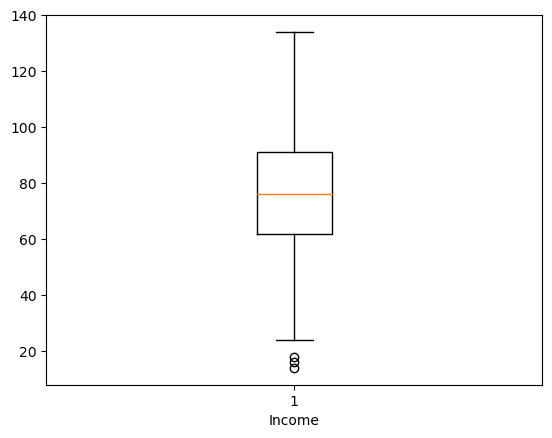

In [3]:
plt.boxplot(y)
plt.xlabel("Income")
plt.show()

In [ ]:
data="2023-05-30 07:37:16.0300000,2023-05-30 09:44:43.1730000"

In [33]:
data="""
Index  P   n1      n2      n3      n4      n5      n6      n7      n8      n9   
0   NaN  0.0  0.2000  0.4000  0.6000  0.8000  1.0000  1.2000  1.4000  1.6000
1   0.0  1.0  0.8039  0.6286  0.4855  0.3753  0.2929  0.2318  0.1863  0.1520   
2   0.2  1.0  0.7983  0.6201  0.4771  0.3683  0.2876  0.2279  0.1835  0.1500   
3   0.4  1.0  0.7789  0.5924  0.4508  0.3473  0.2720  0.2167  0.1754  0.1442   
4   0.6  1.0  0.7349  0.5377  0.4043  0.3124  0.2470  0.1989  0.1628  0.1351   
5   0.8  1.0  0.6301  0.4433  0.3368  0.2658  0.2147  0.1762  0.1465  0.1234   
6   1.0  0.5  0.3828  0.3105  0.2559  0.2130  0.1787  0.1510  0.1286  0.1102   
7   1.2  0.0  0.1544  0.1871  0.1795  0.1621  0.1433  0.1257  0.1103  0.0965   
8   1.4  0.0  0.0717  0.1101  0.1216  0.1197  0.1120  0.1024  0.0925  0.0831   
9   1.6  0.0  0.0400  0.0682  0.0829  0.0876  0.0865  0.0824  0.0765  0.0707   
10  1.8  0.0  0.0249  0.0449  0.0580  0.0647  0.0668  0.0659  0.0633  0.0597   
11  2.0  0.0  0.0168  0.0312  0.0418  0.0485  0.0519  0.0528  0.0520  0.0502   
12  3.0  0.0  0.0042  0.0082  0.0118  0.0149  0.0174  0.0193  0.0207  0.0216
"""

df = pd.read_csv(io.StringIO(data), sep='\s+')
for column in df.columns:
    df[column]=df[column].astype(float)
df=df.set_index('Index')
columns=df.columns

#print(df)
p = 0.2020202
n=len(df)

objdict={}
for index,row in df.iterrows():
    deviations=[]
    for column in columns:
        x=row[column]
        deviation=(abs(x-p)) 
        #print(deviation)
        if deviation >=0:
            deviations.append(deviation)
    variance=min(deviations)
    objdict[index]=variance
    
print(objdict)

temp = min(objdict.values())
print(temp)

result = {key:val for key,val in objdict.items() if val == min(objdict.values())}

print(result)
    


{0.0: 0.0020201999999999998, 1.0: 0.015720200000000017, 2.0: 0.0020201999999999998, 3.0: 0.014679799999999993, 4.0: 0.0031202000000000174, 5.0: 0.012679799999999991, 6.0: 0.010979799999999984, 7.0: 0.014920200000000022, 8.0: 0.08042020000000001, 9.0: 0.11442020000000001, 10.0: 0.1352202, 11.0: 0.14922020000000003, 12.0: 0.1804202}
0.0020201999999999998
{0.0: 0.0020201999999999998, 2.0: 0.0020201999999999998}


[[1.         0.22447028 0.05038691 0.01131036]
 [1.         0.22716925 0.05160587 0.01172327]
 [1.         0.22988965 0.05284925 0.0121495 ]
 ...
 [1.         0.22988965 0.05284925 0.0121495 ]
 [1.         0.22716925 0.05160587 0.01172327]
 [1.         0.22447028 0.05038691 0.01131036]]


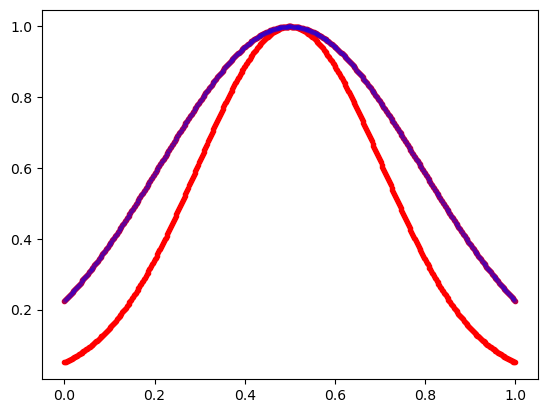

you can see degree of 1 is the best


In [29]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

n=500
x = np.linspace(0, 1, n)
mu=x.mean()
sig=x.std()

y=gaussian(x,mu,sig)

poly = PolynomialFeatures(degree=3)

curve_y = poly.fit_transform(np.array(y).reshape(-1,1))
print(curve_y)

#three degrees of free
degree_of_freedom=1
plt.plot(x, curve_y[:,degree_of_freedom], '.',c="red")
degree_of_freedom=2
plt.plot(x, curve_y[:,degree_of_freedom], '.',c="red")
plt.plot(x, y, '.',alpha=0.2, c="blue")
plt.show()

print("you can see degree of 1 is the best")
#plt.show()